# Machine Learning Engineer Nanodegree
## Starbuck's Capstone Challenge
Matteo Giuliani  
October 11th, 2024

## I. Definition

### Project Overview

Starbucks, like many companies, wants to make sure that their customers are aware of and use the special offers and promotions they send out.
These offers could include discounts on coffee or snacks, or buy-one-get-one-free deals. 
The main challenge is to figure out how to make sure that the right offers are sent to the right customers—essentially, understanding what kinds of promotions different customers like and are likely to respond to.

##### Problem Domain:
Starbucks sends out different types of offers to customers through its mobile app, such as discounts, BOGO (buy-one-get-one-free) deals, or even just information about a new product. But not all customers are interested in every offer.
Some people might be more inclined to respond to a 20% discount, while others might be more interested in trying a new product for free.
The goal is to use data to identify which types of offers are most effective for which customers, and when the best time is to send them.

##### Project Origin:
This project comes from a real-world problem that Starbucks faces as it tries to improve customer engagement and satisfaction.
By analyzing data about customer behavior and the effectiveness of different offers, we can help Starbucks better understand its customers and send out promotions that they are more likely to appreciate and use. 
This means a better experience for customers and more successful marketing efforts for Starbucks.

##### Data Sets and Input Data:
The project uses data that includes:
- **Customer Profiles (profiles.json)**: Information about customers, such as their age, income, and when they became members.
- **Offers Data (portfolio.json)**: Details about the different offers that were sent out, including the type of offer, its duration, and the reward provided.
- **Transaction Data (transcript.json)**: Records of purchases made by customers, showing whether they responded to offers and what they bought.

The challenge is to analyze this data and create a model that predicts which offers each customer is likely to respond to, allowing Starbucks to better target its promotions and improve customer satisfaction. 
The ultimate goal is to optimize how offers are sent out to improve both customer experience and sales.


### Problem Statement

The primary challenge is to determine which types of promotional offers are most effective for different customers, based on their preferences and behaviors. 
Starbucks needs a way to match each offer type—such as discounts, BOGO (buy-one-get-one-free) deals, or new product trials—to the customers who are most likely to respond positively. This problem arises from the need to improve the effectiveness of marketing efforts, which in turn could enhance customer satisfaction and increase revenue.

The goal is to build a predictive model that can analyze customer data and predict the likelihood that a customer will respond to a particular offer. 
This model will allow Starbucks to make data-driven decisions when sending out offers, ensuring that customers receive promotions that are relevant to their interests and habits.

To solve this problem, the following strategy will be employed:

1. **Data Exploration**: Investigate the structure and quality of the dataset, identifying key features and understanding how customer demographics, offers, and transactions are related.
2. **Data Preprocessing**: Clean and preprocess the data, handling any missing values, reaname columns or adjust data format.
3. **Exploratory Data Analysis (EDA)**: Analyze the relationships between customer demographics, purchase behaviors, and offer responses to identify trends and insights that can inform model building.
4. **Model Selection and Training**: Train two machine learning models: a Random Forest and a Decision Tree. These models will be designed to predict the likelihood of a customer responding to an offer.
5. **Model Evaluation**: Compare the performance of the Random Forest and Decision Tree models against a benchmark K-Neighbors Classifier. The primary evaluation metric will be the F1 score, which balances precision and recall, providing a measure of a model’s effectiveness in identifying positive responses to offers.

### Anticipated Solution
The intended solution is a predictive model that identifies which offers are most suitable for each customer segment. By sending personalized offers, Starbucks can increase the engagement rate of their promotions and ensure that customers receive offers they are more likely to use. 

This solution is expected to improve marketing efficiency, reducing the costs associated with sending irrelevant offers and increasing customer satisfaction. Customers benefit from receiving promotions that match their preferences, while Starbucks benefits from higher conversion rates and increased sales. Additionally, the analysis could provide deeper insights into customer behavior, helping Starbucks make more informed decisions regarding future promotions and marketing strategies.

### Metrics

For this project, I will build two models using **RandomForestClassifier** and **DecisionTreeClassifier**, and compare their **F1 score** against a **KNeighborsClassifier** benchmark.

##### Metric Selection
- **F1 Score**: The primary metric for comparison, as it balances **precision** and **recall**. This is crucial for the Starbucks Challenge, where both false positives (predicting a response that doesn’t occur) and false negatives (missing a responder) matter.

##### Model Comparison
- **RandomForestClassifier**: Uses multiple decision trees for robust predictions and reduces overfitting.
- **DecisionTreeClassifier**: A simpler model that is easier to interpret but more prone to overfitting.
- **KNeighborsClassifier**: Serves as a benchmark model, offering a straightforward comparison point for more complex models.

Each model’s F1 score will be compared to see if RandomForest or DecisionTree significantly outperforms the benchmark, helping select the best model for predicting customer responses to Starbucks offers.

## II. Analysis

### Data Exploration

The dataset consists of three distinct files:

* **portfolio.json** - Contains details about various offers, including their IDs and specific attributes like type and duration.
* **profile.json** - Includes demographic details for each customer.
* **transcript.json** - Tracks all records of interactions, including transactions, receipt of offers, views, and completions.

Below is a description of the structure and details for each variable found in the files:



**portfolio.json**
* **id** (string) - Unique identifier for each offer.
* **offer_type** (string) - Describes the nature of the offer, such as "Buy One Get One," discounts, or informational.
* **difficulty** (int) - The minimum expenditure required to qualify for the offer.
* **reward** (int) - The incentive given upon successful completion of the offer.
* **duration** (int) - Validity period of the offer, measured in days.
* **channels** (list of strings) - Communication methods used for the offer.



**profile.json**
* **age** (int) - The customer's age.
* **became_member_on** (int) - The registration date when the customer joined the app.
* **gender** (str) - Indicates the customer's gender (note: some entries include 'O' for non-binary or other).
* **id** (str) - Unique identifier for each customer.
* **income** (float) - The annual earnings of the customer.


**transcript.json**
* **event** (str) - Describes the type of interaction (e.g., transaction, receipt of an offer, viewing of an offer).
* **person** (str) - Identifies the customer associated with each interaction.
* **time** (int) - Indicates the time in hours since the beginning of the testing period, starting at hour zero.
* **value** (dict of strings) - Contains either a transaction amount or an offer ID, depending on the interaction type.


### Exploratory Visualization

In [296]:
import pandas as pd

profile_df = pd.read_json('datasets/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('datasets/transcript.json', orient='records', lines=True)
portfolio_df = pd.read_json('datasets/portfolio.json', orient='records', lines=True)

##### Profile dataset visualization

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

def column_bar_plot(df, colName, pltTitle, palette='viridis', figsize=(8, 6), title_size=16, label_size=12):
    # Check if the column is numerical
    if df[colName].dtype in ['int64', 'float64']:
        value_counts = df[colName].value_counts().sort_index().reset_index()
    else:
        value_counts = df[colName].value_counts().reset_index()
    
    value_counts.columns = [colName, 'Counts']
    
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots()

    sns.barplot(
        data=value_counts,
        x=colName,
        y='Counts',
        palette=palette,
        ax=ax,
        hue=colName if df[colName].dtype not in ['int64', 'float64'] else colName,
        legend=False
    )
    
    for i, v in enumerate(value_counts['Counts']):
        ax.text(i, v + 0.05 * max(value_counts['Counts']), str(v), color='black', 
                fontsize=label_size, ha='center', fontweight='bold')

    ax.set_title(pltTitle, fontsize=title_size, pad=15)
    ax.set_xlabel(colName, fontsize=label_size)
    ax.set_ylabel('Counts', fontsize=label_size)
    plt.xticks(rotation=45, ha='right')
    sns.despine(left=True)
    plt.tight_layout()
    plt.show()


def distribution_plot(df, colName, pltTitle, palette='viridis', figsize=(8, 6), title_size=16, label_size=12, bins=30):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots()

    sns.histplot(
        data=df,
        x=colName,
        bins=bins,
        kde=True,
        color=sns.color_palette(palette, 1)[0],
        ax=ax
    )
    
    ax.set_title(pltTitle, fontsize=title_size, pad=15)
    ax.set_xlabel(colName, fontsize=label_size)
    ax.set_ylabel('', fontsize=label_size)
    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

def grouped_bar_plot(df, colName, hueColName, pltTitle, palette='viridis', figsize=(15, 5), title_size=16, label_size=12):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots()
    
    sns.countplot(
        data=df,
        x=colName,
        hue=hueColName,
        palette=palette,
        ax=ax
    )
    
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=label_size, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    ax.set_title(pltTitle, fontsize=title_size, pad=15)
    ax.set_xlabel(colName, fontsize=label_size)
    ax.set_ylabel('Count', fontsize=label_size)
    
    ax.legend(title=hueColName, title_fontsize=label_size, fontsize=label_size)
    sns.despine(left=True)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [298]:
print("the profile dataset has {0} rows and {1} columns".format(str(profile_df.shape[0]), str(profile_df.shape[1])))

the profile dataset has 17000 rows and 5 columns


In [299]:
profile_df.describe(include='all')

,gender,age,id,became_member_on,income
count,14825,17000.000000,17000,1.700000e+04,14825.000000
unique,3,NaN,17000,NaN,NaN
top,M,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
freq,8484,NaN,1,NaN,NaN
mean,NaN,62.531412,NaN,2.016703e+07,65404.991568
std,NaN,26.738580,NaN,1.167750e+04,21598.299410
min,NaN,18.000000,NaN,2.013073e+07,30000.000000
25%,NaN,45.000000,NaN,2.016053e+07,49000.000000
50%,NaN,58.000000,NaN,2.017080e+07,64000.000000
75%,NaN,73.000000,NaN,2.017123e+07,80000.000000


In [300]:
profile_df.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [301]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [302]:
#Check for null values
profile_df.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

<Figure size 800x600 with 0 Axes>

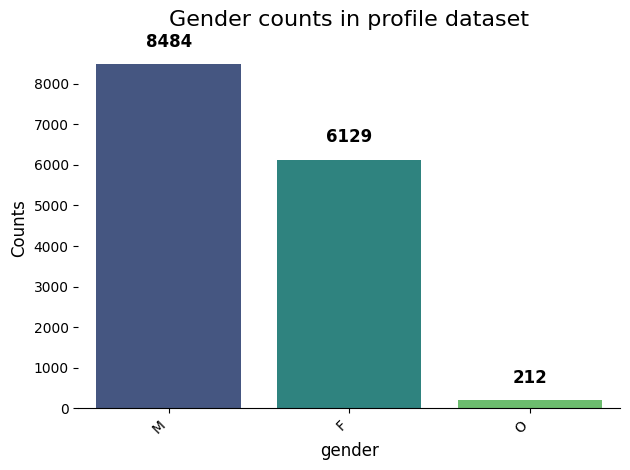

In [303]:
column_bar_plot(profile_df, 'gender', 'Gender counts in profile dataset')

<Figure size 800x600 with 0 Axes>

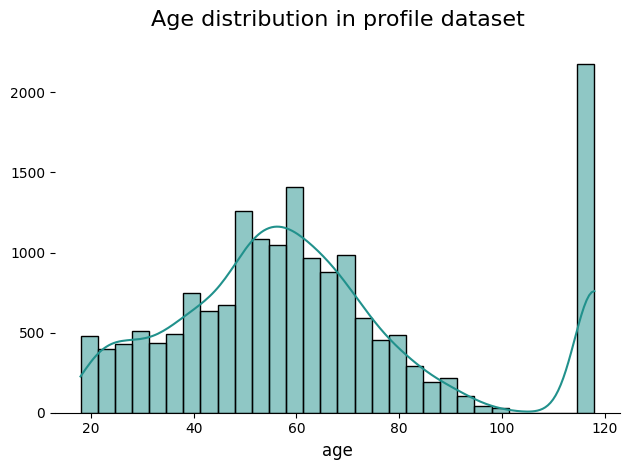

In [307]:
distribution_plot(profile_df, 'age', 'Age distribution in profile dataset')

In [259]:
profile_df[profile_df['age']> 100]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN



A large number of rows have an age value of 118. Upon examining these rows, it is evident that when the age is 118, the gender and income fields are null.
I will use this information to clean the dataset later.

#### Transcript dataset visualization

In [260]:
print("the transcript dataset has {0} rows and {1} columns".format(str(transcript_df.shape[0]), str(transcript_df.shape[1])))

the transcript dataset has 306534 rows and 4 columns


In [261]:
transcript_df.describe(include='all')

,person,event,value,time
count,306534,306534,306534,306534.000000
unique,17000,4,5121,NaN
top,94de646f7b6041228ca7dec82adb97d2,transaction,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},NaN
freq,51,138953,14983,NaN
mean,NaN,NaN,NaN,366.382940
std,NaN,NaN,NaN,200.326314
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,186.000000
50%,NaN,NaN,NaN,408.000000
75%,NaN,NaN,NaN,528.000000


In [262]:
transcript_df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [263]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [264]:
#Check for null values
transcript_df.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [265]:
from collections import Counter

values = transcript_df['value'].apply(lambda x: frozenset(x.keys()))
values_counts = Counter(values)

combined_key_counts = Counter()

for frozenset_key, count in values_counts.items():
    combined_key = ', '.join(sorted(frozenset_key))
    combined_key_counts[combined_key] += count

print('We have 4 different possibility in the transcript dataset for the value field:')
for key, count in combined_key_counts.items():
    print(f"'{key}': {count}")


We have 4 different possibility in the transcript dataset for the value field:
'offer id': 134002
'amount': 138953
'offer_id, reward': 33579


<Figure size 800x600 with 0 Axes>

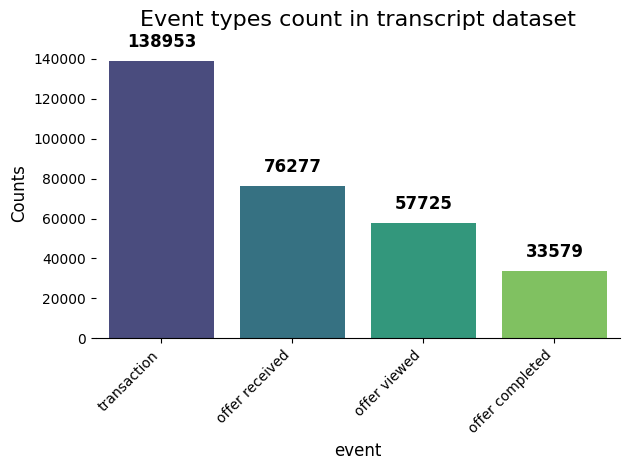

In [266]:
column_bar_plot(transcript_df, 'event', "Event types count in transcript dataset")

#### Portfolio dataset visualization

In [267]:
print("the portfolio dataset has {0} rows and {1} columns".format(str(portfolio_df.shape[0]), str(portfolio_df.shape[1])))

the portfolio dataset has 10 rows and 6 columns


In [268]:
portfolio_df.describe(include='all')

,reward,channels,difficulty,duration,offer_type,id
count,10.000000,10,10.000000,10.000000,10,10
unique,NaN,4,NaN,NaN,3,10
top,NaN,"[web, email, mobile, social]",NaN,NaN,bogo,ae264e3637204a6fb9bb56bc8210ddfd
freq,NaN,4,NaN,NaN,4,1
mean,4.200000,NaN,7.700000,6.500000,NaN,NaN
std,3.583915,NaN,5.831905,2.321398,NaN,NaN
min,0.000000,NaN,0.000000,3.000000,NaN,NaN
25%,2.000000,NaN,5.000000,5.000000,NaN,NaN
50%,4.000000,NaN,8.500000,7.000000,NaN,NaN
75%,5.000000,NaN,10.000000,7.000000,NaN,NaN


In [269]:
portfolio_df.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [270]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [271]:
#Check for null values
portfolio_df.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

<Figure size 800x600 with 0 Axes>

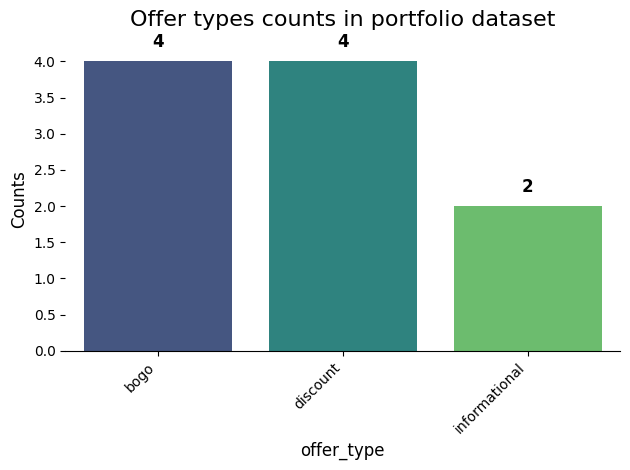

In [272]:
column_bar_plot(portfolio_df, 'offer_type', 'Offer types counts in portfolio dataset')

<Figure size 800x600 with 0 Axes>

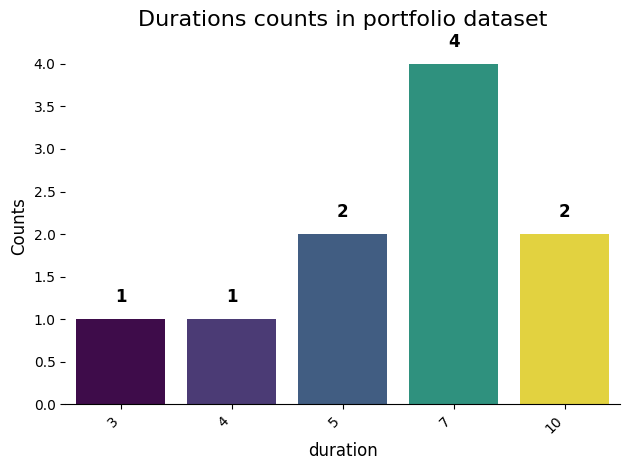

In [273]:
column_bar_plot(portfolio_df, 'duration', 'Durations counts in portfolio dataset')


### Algorithms and Techniques

To predict customer responses to promotional offers, we will use **Random Forest** and **Decision Tree** algorithms.

1. **Random Forest**:
   - **Description**: An ensemble method that builds multiple decision trees and combines their results.
   - **Justification**:
     - **Robustness**: Reduces the risk of overfitting, which is helpful with complex customer data.
     - **Feature Importance**: Identifies which customer traits most influence response to offers.

2. **Decision Tree**:
   - **Description**: A model that splits data into branches based on feature values.
   - **Justification**:
     - **Interpretability**: Easy to understand how decisions are made based on customer data.
     - **Non-linear Relationships**: Captures complex patterns in customer responses.

##### Data Handling
- **Data Exploration**: We will assess the dataset to identify key features related to customer demographics and offer responses.
- **Data Preprocessing**: This step includes cleaning the data, handling missing values, and encoding categorical variables.
- **Exploratory Data Analysis (EDA)**: We will analyze trends and relationships in the data to inform model building.


### Benchmark

We will use a **K-Neighbors Classifier (KNN)** as a benchmark for evaluating our models.

1. **Benchmark Definition**:
   - The KNN model will serve as a baseline, with performance measured using the **F1 score**, which balances precision and recall.

2. **Rationale for Benchmark**:
   - KNN is a simple yet effective algorithm that provides a good starting point for classification tasks.
   - The F1 score is particularly useful for our problem, as it addresses potential imbalances between positive and negative customer responses.

3. **Performance Measurement**:
   - We expect both the Random Forest and Decision Tree models to achieve higher F1 scores than KNN, indicating better predictive accuracy for customer responses.



## III. Methodology

### Data Preprocessing

##### Utlity functions

In [274]:
import numpy as np

def fill_missing_values(df, column, method='mean'):
    """
    Fill missing values in a DataFrame column.

    Parameters
    ----------
    df: DataFrame
        The DataFrame to process.
    column: str
        The column name for which to fill missing values.
    method: str
        The method to use for filling: 'mean', 'median', 'mode', or a specific value.

    Returns
    -------
    df: DataFrame
        DataFrame with filled missing values.
    """
    if method == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif method == 'median':
        df[column] = df[column].fillna(df[column].median())
    elif method == 'mode':
        mode = df[column].mode()[0]
        df[column] = df[column].fillna(mode)
    else:
        df[column] = df[column].fillna(method)
    return df

def remove_outliers(df, column, threshold):
    """
    Remove outliers from a DataFrame based on a threshold.

    Parameters
    ----------
    df: DataFrame
        The DataFrame to process.
    column: str
        The column name to check for outliers.
    threshold: float
        The upper limit to consider for outliers.

    Returns
    -------
    df: DataFrame
        DataFrame with outliers removed.
    """
    return df[df[column] <= threshold]

def expand_dict_column(df, column, new_columns):
    """
    Expand a dictionary-type column into separate columns.

    Parameters
    ----------
    df: DataFrame
        The DataFrame to process.
    column: str
        The name of the column containing dictionaries.
    new_columns: dict
        A dictionary where keys are new column names and values are the keys to extract from the dictionary.

    Returns
    -------
    df: DataFrame
        DataFrame with new columns added from the dictionary.
    """
    for new_col, old_key in new_columns.items():
        df[new_col] = df[column].apply(lambda x: x.get(old_key, 0))
    return df

def rename_cols(df, new_cols_name):
    """
    Rename columns of a DataFrame using a given mapping.

    Parameters
    ----------
    df: DataFrame
        The DataFrame whose columns need to be renamed.
    new_cols_name: dict
        A dictionary where keys are the existing column names and values are the new column names.

    Returns
    -------
    df: DataFrame
        DataFrame with renamed columns.
    """
    df.rename(columns=new_cols_name, inplace=True)
    return df

##### Cleaning profile dataset

- To retain as much data as possible, impute missing values: use the mean for age and income, and the mode for gender.

In [275]:
profile_df.replace({'age': {118: np.nan}}, inplace=True)
profile_df = fill_missing_values(profile_df, 'age', method='mean')
profile_df = fill_missing_values(profile_df, 'income', method='mean')
profile_df = fill_missing_values(profile_df, 'gender', method='mode')

- Treat individuals over the age of 80 as outliers as emerged from the exploratory phase and exclude them from the dataset.


In [276]:
profile_df = remove_outliers(profile_df, 'age', threshold=80)
profile_df.loc[:, 'age'] = profile_df['age'].astype(int)

- Categorize ages into groups for better clarity during Exploratory Data Analysis (EDA):
   * Under 20
   * 20 - 45
   * 46 - 60
   * 61 - 80

In [277]:
profile_df.loc[(profile_df['age'] < 20), 'age_group'] = 'Under 20'
profile_df.loc[(profile_df['age'] >= 20) & (profile_df['age'] <= 45), 'age_group'] = '20-45'
profile_df.loc[(profile_df['age'] >= 46) & (profile_df['age'] <= 60), 'age_group'] = '46-60'
profile_df.loc[(profile_df['age'] >= 61), 'age_group'] = '61-80'
profile_df.drop('age', axis=1, inplace=True)

- Rename columns to improve readability and facilitate merging of dataframes.


In [278]:
cleaned_profile_df = rename_cols(profile_df, {'id':'customer_id' , 'income':'customer_income'} )

##### Clening transcript dataset

- Expand the nested keys in the 'value' column into separate new columns.

In [279]:
transcript_df = expand_dict_column(transcript_df, 'value', 
    {
        'offer_id': 'offer_id',
        'money_gained': 'reward',
        'money_spent': 'amount'
    })

transcript_df.fillna(0, inplace=True)

transcript_df.drop(['value'], axis=1, inplace=True)

- Rename columns to enhance readability and simplify the process of merging dataframes.

In [280]:
cleaned_transcript_df = rename_cols(transcript_df, {'person':'customer_id'})

##### Cleaning portfolio dataset

- Rename columns to enhance readability and simplify the process of merging dataframes.

In [281]:
cleaned_portfolio_df = rename_cols(portfolio_df, {'difficulty':'offer_difficulty' , 'id':'offer_id', 'duration':'offer_duration', 'reward': 'offer_reward'})

### Implementation

##### Exploratory data analysis (EDA)

- Merging the dataframes

In [284]:
dataframe = pd.merge(cleaned_portfolio_df, cleaned_transcript_df, on='offer_id')
dataframe = pd.merge(dataframe, cleaned_profile_df, on='customer_id')
dataframe.head()

,offer_reward,channels,offer_difficulty,offer_duration,offer_type,offer_id,customer_id,event,time,money_gained,money_spent,gender,became_member_on,customer_income,age_group
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,676506bad68e4161b9bbaffeb039626b,offer completed,0,10,0.0,M,20170515,92000.0,20-45
1,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,afce4cf8194f4e90a3e92da941a23601,offer completed,0,10,0.0,M,20160926,55000.0,20-45
2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,de90515e9f174ddfb8b4c677448286ef,offer completed,0,10,0.0,M,20170911,74000.0,46-60
3,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,72b5a6743ee84f01a40fd6f1a378c560,offer completed,0,10,0.0,F,20170312,68000.0,20-45
4,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,5725b27c56ce42bb86569bd965ab35eb,offer completed,0,10,0.0,M,20170128,92000.0,46-60


- Average income of customers using the app

In [288]:
average_income = float(dataframe['customer_income'].mean())
print(f'The average income of customers is: {average_income}')

The average income of customers is: 68883.00683107211


<Figure size 800x600 with 0 Axes>

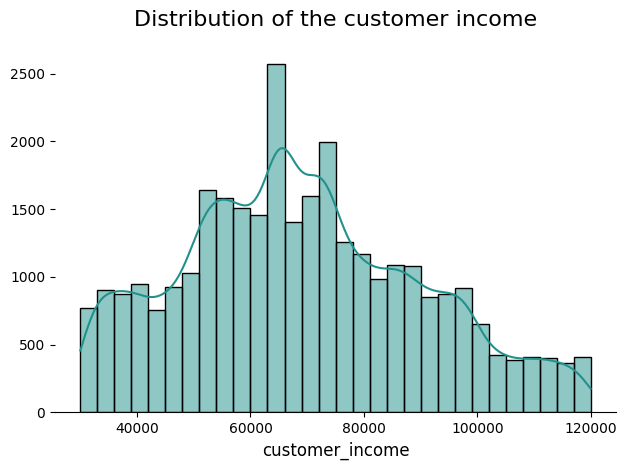

In [305]:
distribution_plot(dataframe, 'customer_income', 'Distribution of the customer income')

- Most used offer by the customers

In [309]:
dataframe['offer_type'].value_counts()

offer_type
discount    16696
bogo        14548
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

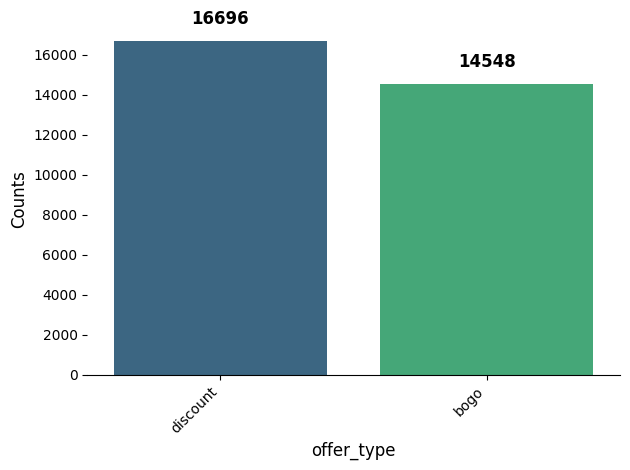

In [308]:
column_bar_plot(dataframe, 'offer_type', 'Distribution of offer types')

##### Age groups distibution of customers

<Figure size 800x600 with 0 Axes>

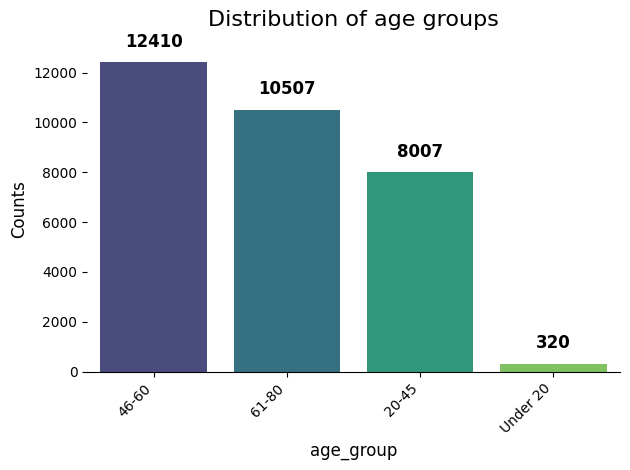

In [310]:
column_bar_plot(dataframe, 'age_group', 'Distribution of age groups')


Contrary to common expectations, the Starbucks app is most popular among users aged 46-60, with those aged 61-80 coming in second. Surprisingly, the younger demographic of 20-45, who are often assumed to be the primary app users, do not dominate usage in this instance.

##### Actions to the offers that customers received

In [313]:
dataframe['event'].value_counts()

event
offer completed    31244
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

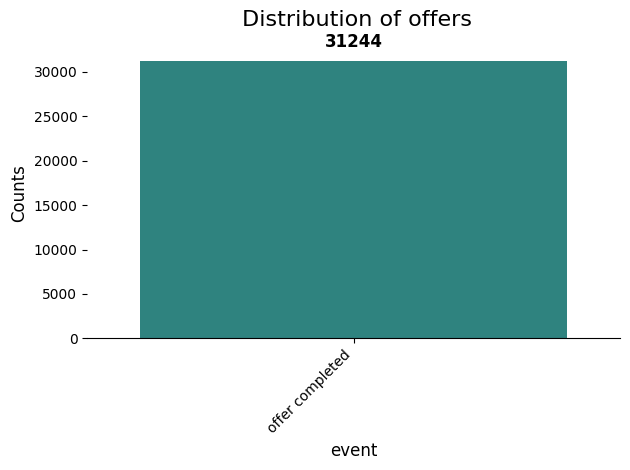

In [311]:
column_bar_plot(dataframe, 'event', ' Distribution of offers')

##### Customer gender analysis

In [314]:
dataframe['gender'].value_counts()

gender
M    16731
F    14036
O      477
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

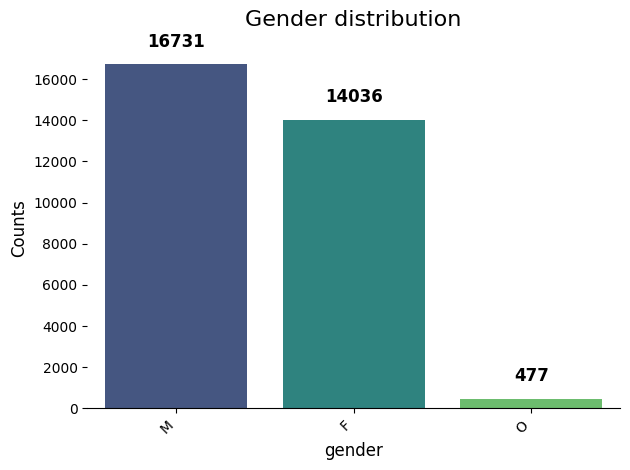

In [315]:
column_bar_plot(dataframe, 'gender', 'Gender distribution')

<Figure size 1500x500 with 0 Axes>

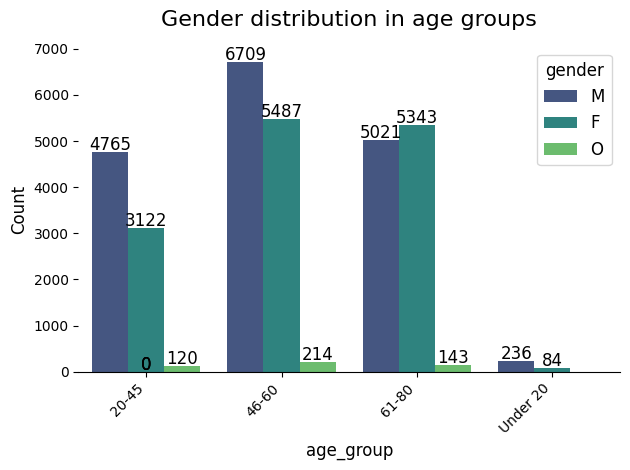

In [318]:
grouped_bar_plot(dataframe, 'age_group', 'gender', 'Gender distribution in age groups')

<Figure size 1500x500 with 0 Axes>

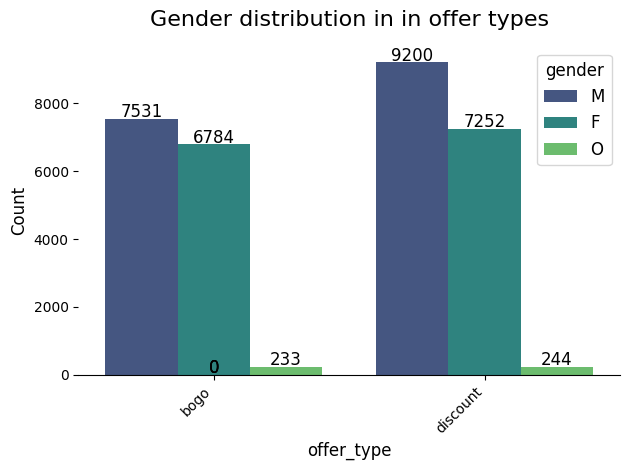

In [319]:
grouped_bar_plot(dataframe, 'offer_type', 'gender', 'Gender distribution in in offer types')

<Figure size 1500x500 with 0 Axes>

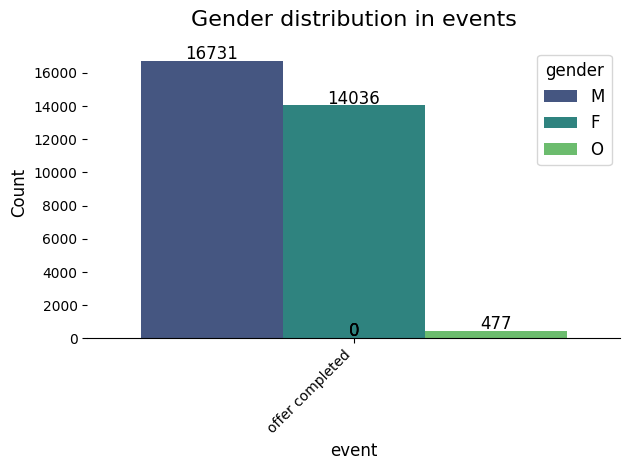

In [320]:
grouped_bar_plot(dataframe, 'event', 'gender', 'Gender distribution in events')

##### Offer analysis

<Figure size 1500x500 with 0 Axes>

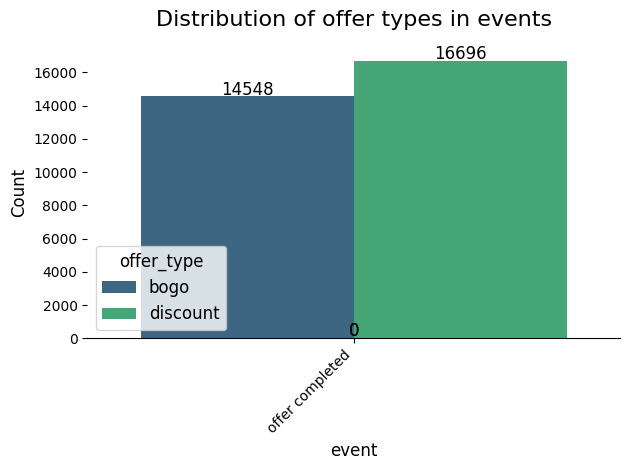

In [322]:
grouped_bar_plot(dataframe, 'event', 'offer_type', 'Distribution of offer types in events')

<Figure size 1500x500 with 0 Axes>

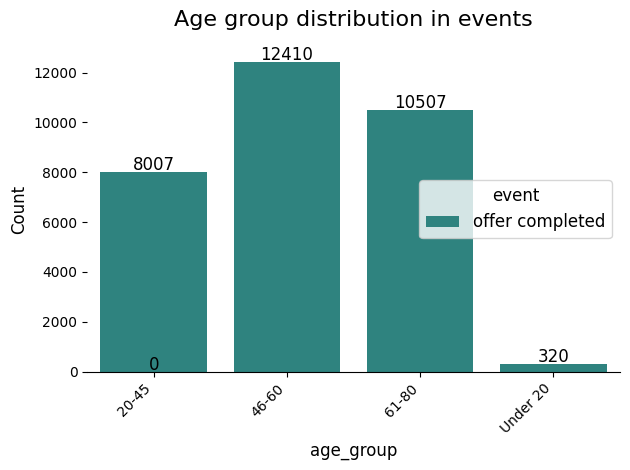

In [323]:
grouped_bar_plot(dataframe, 'age_group', 'event', 'Age group distribution in events')


### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_


## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_


### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_


## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_


### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_


### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_
